## Hypothesis
\begin{align}
h_\theta(x) = \theta_0 + \theta_1 x
\end{align}

## Cost Function
\begin{align}
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
\end{align}

## Goal
\begin{align}
minimize_{\theta_0, \theta_1} J(\theta_0, \theta_1)
\end{align}

http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

https://stackoverflow.com/questions/17091769/python-pandas-fill-a-dataframe-row-by-row

https://github.com/jermwatt/mlrefined/blob/gh-pages/presentations/8_Linear_regression/8_4_feature_scaling_SLIDES.ipynb

https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

http://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/

https://eliezersilva.blog/2015/12/26/embedding-gif-animations-in-ipython-notebook/


## Facilitar eliminando primero  $\theta_1$

Así que la función es constante
$ h_\theta(x) = \theta_0 $ 

La función de coste queda

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 - y^{(i)})^2 $


In [40]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [41]:
data = pd.DataFrame(columns=('x', 'y'))
data.loc['1'] = pd.Series({'x':1., 'y':1.})
data.loc['2'] = pd.Series({'x':2., 'y':2.})
data.loc['3'] = pd.Series({'x':3., 'y':3.})
data.loc['4'] = pd.Series({'x':4., 'y':4.})
data


,x,y
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0


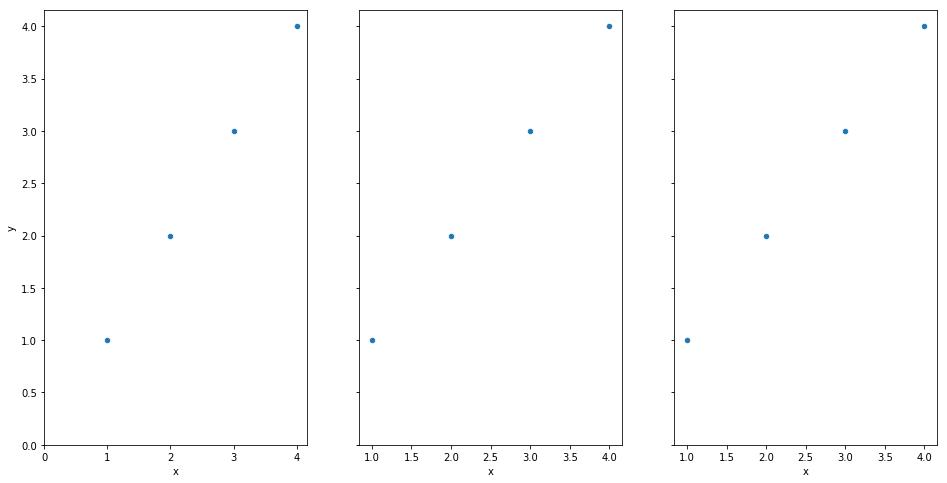

In [26]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='x', y='y', ax=axs[0], figsize=(16, 8), ylim=0, xlim=0)
data.plot(kind='scatter', x='x', y='y', ax=axs[1])
data.plot(kind='scatter', x='x', y='y', ax=axs[2])

In [33]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='y ~ x', data=data).fit()

# print the coefficients
lm.params

Intercept    1.110223e-16
x            1.000000e+00
dtype: float64

In [34]:
X_new = pd.DataFrame({'x': [50]})
X_new.head()

,x
0,50


In [35]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    50.0
dtype: float64

In [36]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'x': [data.x.min(), data.y.max()]})
X_new.head()

,x
0,1.0
1,4.0


In [37]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    1.0
1    4.0
dtype: float64

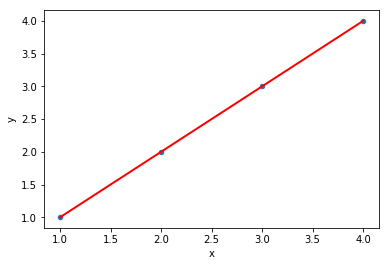

In [38]:
# first, plot the observed data
data.plot(kind='scatter', x='x', y='y')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)